In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
df_1 = pd.read_csv('Credit_card.csv')
df_2 = pd.read_csv('Credit_card_label.csv')

In [ ]:
df_1.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [ ]:
df_2.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [ ]:
df = pd.merge(df_1, df_2, on='Ind_ID')

In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
print(f"СТР: {df.shape[0]}, СТ: {df.shape[1]}")

СТР: 1548, СТ: 19


In [ ]:
df = df.fillna(df.median(numeric_only=True))
df = df.fillna('Unknown')

In [ ]:
t_n = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = t_n.fit_transform(df[col].astype(str))

In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,180000.0,1,1,1,1,-18772.0,365243,1,0,0,0,17,2,1
1,5009744,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,1,0,17,2,1
2,5009746,0,1,0,0,315000.0,0,1,1,1,-15661.5,-586,1,1,1,0,17,2,1
3,5009749,0,1,0,0,166500.0,0,1,1,1,-13557.0,-586,1,1,1,0,17,2,1
4,5009752,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,1,0,17,2,1


In [ ]:
X = df.drop('label', axis=1)
y = df['label']

In [ ]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
print(X_train)

       Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0     5008827       1          1              1         0       180000.0   
1     5009744       0          1              0         0       315000.0   
2     5009746       0          1              0         0       315000.0   
3     5009749       0          1              0         0       166500.0   
4     5009752       0          1              0         0       315000.0   
...       ...     ...        ...            ...       ...            ...   
1233  5146558       1          0              1         2       157500.0   
1234  5029400       0          0              0         0       112500.0   
1235  5009207       0          0              0         0       292500.0   
1236  5022449       0          0              0         0       315000.0   
1237  5044818       0          0              1         0       135000.0   

      Type_Income  EDUCATION  Marital_status  Housing_type  Birthday_count  \
0        

In [ ]:
clf_sklearn = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_sklearn.fit(X_train, y_train)
y_pred_sklearn = clf_sklearn.predict(X_test)
acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Итоговая точность модели (Accuracy): {acc_sklearn:.4f}")
print(f"В процентах: {acc_sklearn * 100:.2f}%")

Итоговая точность модели (Accuracy): 0.9968
В процентах: 99.68%


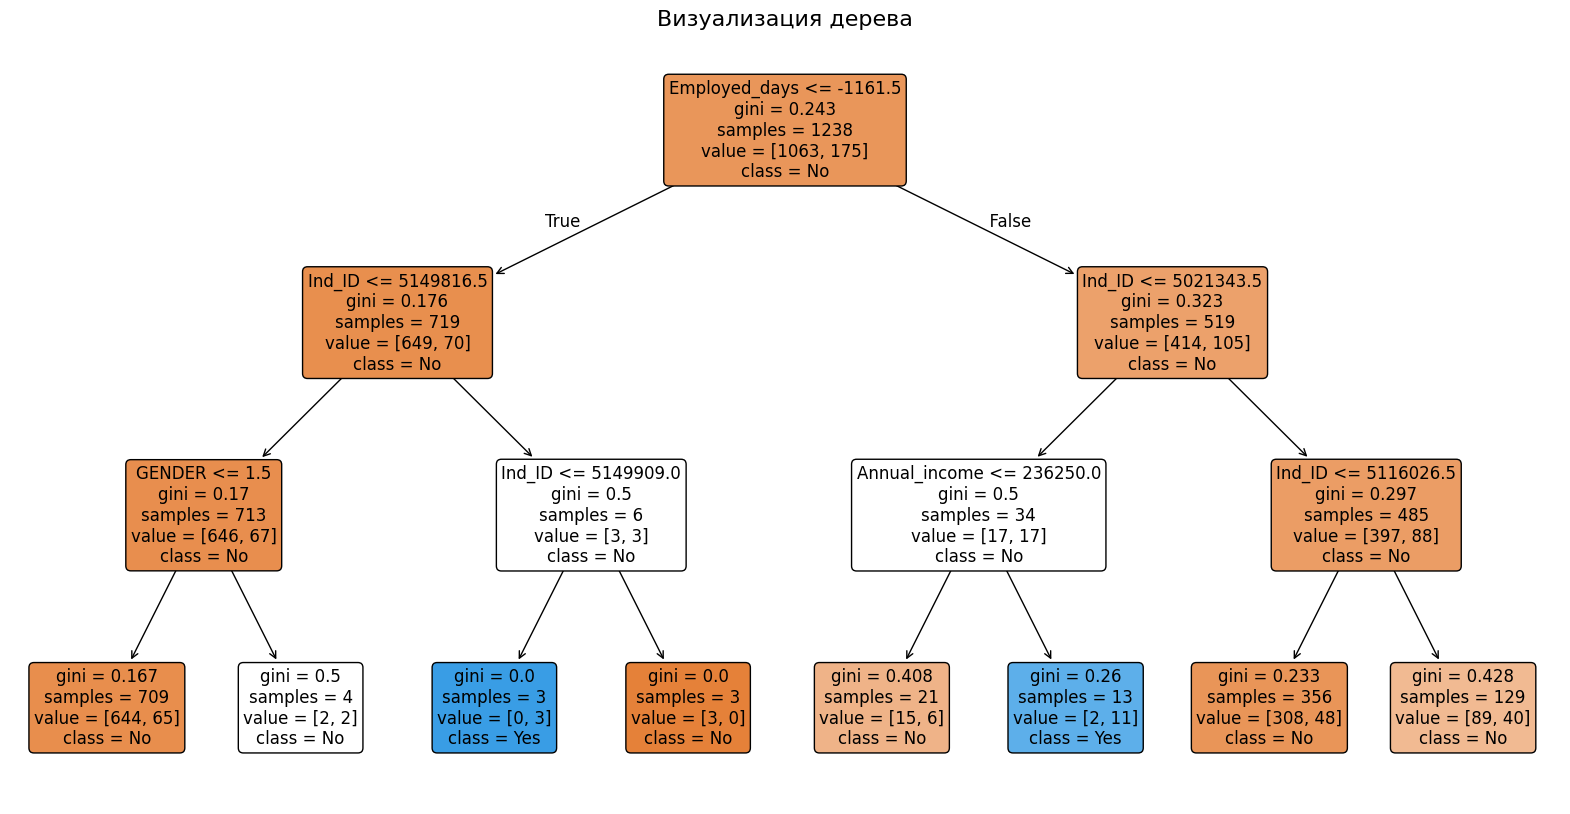

In [ ]:
plt.figure(figsize=(20, 10), dpi=100)
tree.plot_tree(
    clf_sklearn,
    feature_names=df.drop('label', axis=1).columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    fontsize=12
)

plt.title("Визуализация дерева", fontsize=16)
plt.show()

In [ ]:
def get_gini(groups, classes):
    n = float(sum(len(g) for g in groups))
    gini = 0.0
    for g in groups:
        if not g: continue
        score = sum(( [row[-1] for row in g].count(c) / len(g) )**2 for c in classes)
        gini += (1.0 - score) * (len(g) / n)
    return gini

In [ ]:
def get_best_split(dataset):
    classes = list(set(row[-1] for row in dataset))
    best = {'gini': 1.0}
    for idx in range(len(dataset[0]) - 1):
        for row in dataset:
            left = [r for r in dataset if r[idx] < row[idx]]
            right = [r for r in dataset if r[idx] >= row[idx]]
            gini = get_gini((left, right), classes)
            if gini < best['gini']:
                best = {'idx': idx, 'val': row[idx], 'groups': (left, right), 'gini': gini}
    return best


In [ ]:
def split_node(node, max_depth, depth):
    left, right = node.pop('groups')
    if not left or not right or depth >= max_depth:
        node['left'] = node['right'] = Counter([r[-1] for r in left + right]).most_common(1)[0][0]
        return
    for side, data in [('left', left), ('right', right)]:
        node[side] = get_best_split(data)
        split_node(node[side], max_depth, depth + 1)

In [ ]:
def predict(node, row):
    branch = node['left'] if row[node['idx']] < node['val'] else node['right']
    if isinstance(branch, dict):
        return predict(branch, row)
    return branch

In [ ]:
train = np.column_stack((X_train, y_train)).tolist()
tree = get_best_split(train)
split_node(tree, max_depth=3, depth=1)
acc = sum(predict(tree, r) == r[-1] for r in np.column_stack((X_test, y_test))) / len(y_test)
print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 96.77%
